In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Merging 12 months of sales data into single csv

In [2]:
april = pd.read_csv('/Users/kogatambharath/Downloads/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_April_2019.csv')

In [3]:
april.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [4]:
import os

# Loop through the files and concatenate data

In [5]:
files = [file for file in os.listdir('/Users/kogatambharath/Downloads/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data')]
all_months_data = pd.DataFrame()

for file in files:
    april = pd.read_csv('/Users/kogatambharath/Downloads/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_April_2019.csv')
    all_months_data = pd.concat([all_months_data,april])

all_months_data.to_csv('combined.csv',index=False)


    

In [6]:
final = pd.read_csv('combined.csv')

In [7]:
final.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [8]:
final.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,219888,219888,219888,219888,219888,219888
unique,17538,20,8,19,13584,17120
top,Order ID,Lightning Charging Cable,1,14.95,Order Date,Purchase Address
freq,420,26412,198696,26412,420,420


In [9]:
final.shape

(220596, 6)

In [10]:
final.isnull().sum()

Order ID            708
Product             708
Quantity Ordered    708
Price Each          708
Order Date          708
Purchase Address    708
dtype: int64

In [11]:
 import pandas as pd

columns_to_check = ['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date', 'Purchase Address']
final.dropna(subset=columns_to_check, inplace=True)



In [12]:
final.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

# Drop rows with missing values in specific columns

In [13]:
import pandas as pd

# Assuming your data is in a pandas DataFrame called 'final'
# Check for rows with invalid date formats and remove them

# Assuming 'Order Date' contains date strings in the format 'MM/DD/YY HH:mm'
invalid_date_rows = final[~final['Order Date'].str.contains(r'\d{2}/\d{2}/\d{2} \d{2}:\d{2}')]

# Remove rows with invalid dates from the DataFrame
final = final.drop(index=invalid_date_rows.index)

# Now extract the 'Month' from the 'Order Date' column and convert it to integer type
final['Month'] = final['Order Date'].str[0:2].astype('int32')
final.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


# Adding Sales column

In [14]:
final['Quantity Ordered'] = pd.to_numeric(final['Quantity Ordered'])

In [15]:
final['Price Each'] = pd.to_numeric(final['Price Each'])

In [16]:
final['Sales'] = final['Quantity Ordered']* final['Price Each']

In [17]:
 final.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [18]:
import pandas as pd

# Assuming your data is in a pandas DataFrame called 'final'

# Create a new column 'City' and extract the city name from the 'Purchase Address'
final['City'] = final['Purchase Address'].apply(lambda x: x.split(',')[1].strip())

# Now the 'City' column contains the extracted city names
print(final.head())


  Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable                 2       11.95   
2   176559  Bose SoundSport Headphones                 1       99.99   
3   176560                Google Phone                 1      600.00   
4   176560            Wired Headphones                 1       11.99   
5   176561            Wired Headphones                 1       11.99   

       Order Date                      Purchase Address  Month   Sales  \
0  04/19/19 08:46          917 1st St, Dallas, TX 75001      4   23.90   
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215      4   99.99   
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4  600.00   
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4   11.99   
5  04/30/19 09:27     333 8th St, Los Angeles, CA 90001      4   11.99   

          City  
0       Dallas  
2       Boston  
3  Los Angeles  
4  Los Angeles  
5  Los Angeles  


In [19]:
final.groupby('Month').sum()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,City
Month,,,,,,,,
4,1765581765591765601765601765611765621765631765...,USB-C Charging CableBose SoundSport Headphones...,246468,40350043.08,04/19/19 08:4604/07/19 22:3004/12/19 14:3804/1...,"917 1st St, Dallas, TX 75001682 Chestnut St, B...",40625997.84,DallasBostonLos AngelesLos AngelesLos AngelesS...
5,1769781775511777781777781790761790761791341800...,Apple Airpods Headphones27in FHD MonitoriPhone...,348,126665.40,05/01/19 03:2905/01/19 00:1305/01/19 00:4805/0...,"589 Lake St, Portland, OR 97035615 Lincoln St,...",126711.48,PortlandSan FranciscoBostonBostonSan Francisco...


In [20]:
# Calculate the total sales for each month
monthly_sales = final.groupby('Month')['Sales'].sum()

# Find the best month for sales (month with the highest sales revenue)
best_month = monthly_sales.idxmax()

# Calculate how much was earned in that best month
highest_earnings = monthly_sales.max()

In [21]:
print(f"The best month for sales was Month {best_month}, and the earnings in that month were ${highest_earnings:.2f}")

The best month for sales was Month 4, and the earnings in that month were $40625997.84


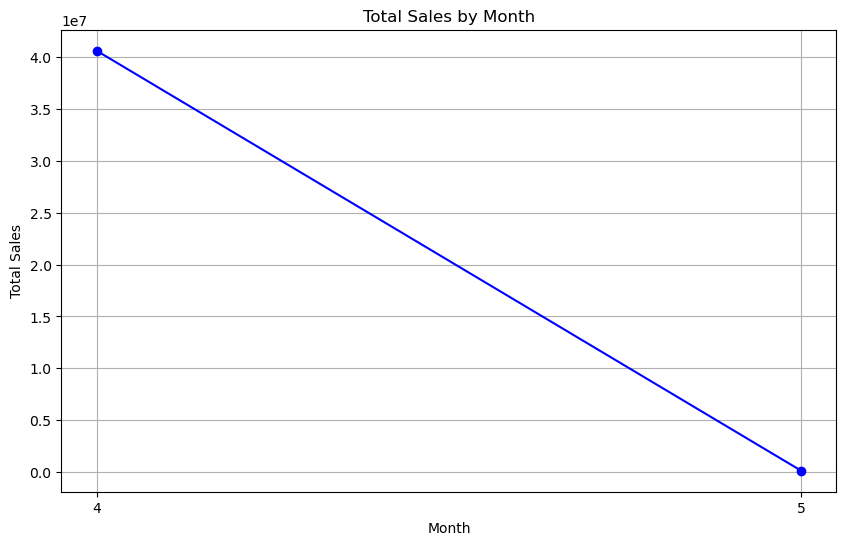

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have the 'monthly_sales' DataFrame containing the total sales for each month

# Create a line plot to visualize the monthly sales data
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-', color='b')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Total Sales by Month')
plt.xticks(monthly_sales.index)
plt.grid(True)
plt.show()
  

In [32]:
 city_sales = final.groupby('City').sum()

In [33]:
city_sales

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
City,,,,,,,,
Atlanta,1765641765711765821765891766231766271766341766...,USB-C Charging CableLightning Charging CableBo...,19596,3394558.56,04/12/19 10:5804/19/19 14:2904/27/19 12:2004/0...,"790 Ridge St, Atlanta, GA 30301253 Johnson St,...",70668,3413459.04
Austin,1765911766091766741766771766861767011767051767...,Apple Airpods HeadphonesApple Airpods Headphon...,13104,2057851.80,04/21/19 07:2104/11/19 16:5904/20/19 20:5304/0...,"600 Maple St, Austin, TX 73301267 11th St, Aus...",46704,2072203.08
Boston,1765591765661765781765811765851765851766001766...,Bose SoundSport HeadphonesWired HeadphonesAppl...,26280,4220913.00,04/07/19 22:3004/08/19 14:0504/09/19 23:3504/0...,"682 Chestnut St, Boston, MA 0221583 7th St, Bo...",92136,4246561.92
Dallas,1765581765691765701765771765961766021766101766...,USB-C Charging Cable27in 4K Gaming MonitorAA B...,18228,3020268.48,04/19/19 08:4604/16/19 19:2304/22/19 15:0904/0...,"917 1st St, Dallas, TX 75001657 Hill St, Dalla...",64824,3034085.64
Los Angeles,1765601765601765611765671765741765741765761765...,Google PhoneWired HeadphonesWired HeadphonesGo...,40788,6575892.24,04/12/19 14:3804/12/19 14:3804/30/19 09:2704/1...,"669 Spruce St, Los Angeles, CA 90001669 Spruce...",145284,6616788.84
New York City,1765721765751765791765901765991766131766371766...,Apple Airpods HeadphonesAAA Batteries (4-pack)...,32892,5308712.16,04/04/19 20:3004/27/19 00:3004/11/19 10:2304/1...,"149 Dogwood St, New York City, NY 10001433 Hil...",116844,5359053.36
Portland,1765831765931766171766421766461766481766621767...,AAA Batteries (4-pack)Lightning Charging Cable...,16788,2881115.04,04/20/19 12:0004/15/19 13:4504/25/19 08:0304/1...,"146 Jackson St, Portland, OR 97035906 7th St, ...",59400,2893537.32
San Francisco,1765621765651765731765841765861765861765941765...,USB-C Charging CableMacbook Pro LaptopUSB-C Ch...,59844,9724059.72,04/29/19 13:0304/24/19 10:3804/27/19 18:4104/2...,"381 Wilson St, San Francisco, CA 94016915 Will...",213120,9804897.24
Seattle,1765631765681765881766121766241766541766631766...,Bose SoundSport HeadphonesLightning Charging C...,19296,3293337.48,04/02/19 07:4604/15/19 12:1804/02/19 04:0004/0...,"668 Center St, Seattle, WA 98101438 Elm St, Se...",69228,3312122.88


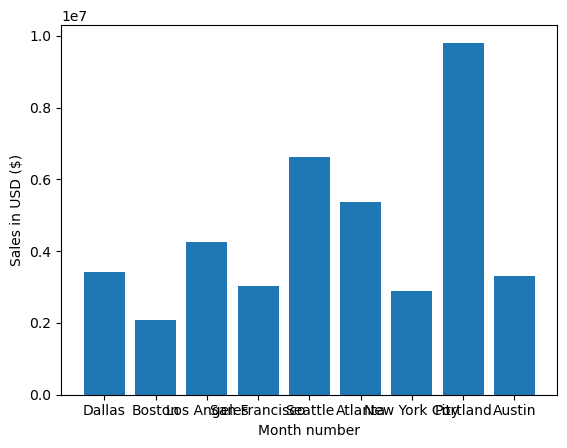

In [36]:

cities = final['City'].unique ()
plt.bar(cities, city_sales ['Sales'])
plt.xticks(cities)
plt.ylabel('Sales in USD ($)')
plt.xlabel( 'Month number')
plt.show ()

In [37]:
import pandas as pd

# Assuming your data is in a pandas DataFrame called 'final'
# If the 'Order Date' column is currently of type string, you can convert it to datetime as follows:

final['Order Date'] = pd.to_datetime(final['Order Date'])

# Now the 'Order Date' column has been converted to a datetime data type.


/var/folders/zn/_kp816v90sl36_p34mjl30r80000gn/T/ipykernel_66359/1691772106.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  final['Order Date'] = pd.to_datetime(final['Order Date'])


In [39]:
final['Order Date']

0        2019-04-19 08:46:00
2        2019-04-07 22:30:00
3        2019-04-12 14:38:00
4        2019-04-12 14:38:00
5        2019-04-30 09:27:00
                 ...        
220591   2019-04-08 17:11:00
220592   2019-04-15 16:02:00
220593   2019-04-28 14:36:00
220594   2019-04-14 15:09:00
220595   2019-04-18 11:08:00
Name: Order Date, Length: 219468, dtype: datetime64[ns]

In [51]:
import pandas as pd

# Assuming your data is in a pandas DataFrame called 'final'
# If the 'Order Date' column is currently of type string, you can convert it to datetime as follows:

final['Order Date'] = pd.to_datetime(final['Order Date'])

# Extract the date and time components into separate columns
final['Date'] = final['Order Date'].dt.date
final['time'] = final['Order Date'].dt.time

# Now the 'Order Date' column has been converted to a datetime data type,
# and the 'Date' and 'Time' columns contain the extracted components.


In [53]:
final.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Date,Time,hour,Minute,time
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,2019-04-19,08:46:00,08:46:00,46,08:46:00
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,2019-04-07,22:30:00,22:30:00,30,22:30:00
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,2019-04-12,14:38:00,14:38:00,38,14:38:00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,2019-04-12,14:38:00,14:38:00,38,14:38:00
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,2019-04-30,09:27:00,09:27:00,27,09:27:00


In [54]:
Time_sales=final.groupby('Time')['Sales'].sum()

In [48]:
Time_sales

Time
00:00:00    49570.92
00:01:00    22486.68
00:02:00    24165.84
00:03:00    23681.04
00:04:00     3584.04
              ...   
23:55:00    21604.08
23:56:00    24215.28
23:57:00    39010.56
23:58:00    20642.04
23:59:00    31421.88
Name: Sales, Length: 1400, dtype: float64

In [55]:
# Find the hour with the highest total sales
best_hour = Time_sales.idxmax()

# Get the total sales for that hour
best_hour_sales = Time_sales.max()

print(f"The best time to display advertisements is {best_hour} with total sales of ${best_hour_sales:.2f}")


The best time to display advertisements is 19:20:00 with total sales of $135133.92


In [60]:
final.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Date,Time,hour,Minute,time
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,2019-04-19,08:46:00,08:46:00,46,08:46:00
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,2019-04-07,22:30:00,22:30:00,30,22:30:00
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,2019-04-12,14:38:00,14:38:00,38,14:38:00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,2019-04-12,14:38:00,14:38:00,38,14:38:00
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,2019-04-30,09:27:00,09:27:00,27,09:27:00
